# Hands-On Assignment 3

2-1. Decision trees with Breast cancer dataset

2-2. Random Forest with Titanic dataset

## After finishing writing the code for each problem, submit your ipynb file (i.e., this file) to Cybercampus by **11/20 Monday 23:59**

### Submitters are as follows.
 *Note that hands-on assignments can be done collaboratively (**up to 2 students**)*

    Name: Hawon Choi
    Student ID: 1930022

    Name:
    Student ID:



---


## 2-1. Decision trees with Breast cancer dataset


---



Data importing

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

We learn the following Node and DecisionTree classes during the lab

In [2]:

class Node:
    def __init__(self, feature=None, value=None, left=None, right=None, *, label=None):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
        self.label = label

    def is_leaf(self):
        return self.label is not None


class DecisionTree:

    def __init__(self, max_depth=100, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def _stop(self, depth):
        if (depth >= self.max_depth
            or self.n_class_labels == 1
            or self.n_samples < self.min_samples_split):
            return True
        return False

    def _entropy(self, y):
        # np.bincount: Count number of occurrences of each value in array
        weights = np.bincount(y) / len(y)
        entropy = -np.sum([w * np.log2(w) for w in weights if w > 0])
        return entropy

    def _expand_tree(self, X, value):

        # np.argwhere: return indices of X which are less than and equal to value
        # np.flatten: turn multi-dimensional data into vectors
        left_idx = np.argwhere(X <= value).flatten()

        # return indices of X which are greater than
        right_idx = np.argwhere(X > value).flatten()
        return left_idx, right_idx


    # information_gain = parent_entropy - children_entropy
    def _information_gain(self, X, y, value):

        parent_entropy = self._entropy(y)

        # expand the tree with X
        left_idx, right_idx = self._expand_tree(X, value)

        n, n_left, n_right = len(y), len(left_idx), len(right_idx)

        if n_left == 0 or n_right == 0:
            return 0

        # each node has two children (right child and left child)
        children_entropy = (n_left / n) * self._entropy(y[left_idx]) + (n_right / n) * self._entropy(y[right_idx])
        return parent_entropy - children_entropy

    def _best_split(self, X, y, features):
        # create split dict in which we record score, feature, and value to keep the split yielding the maximum score
        split = {'score':- 1, 'feat': None, 'value': None}

        # for each column in 30 columns
        for feat in features:
            # select one feature column
            # example: values in outlook column
            X_feat = X[:, feat]

            # np.unique: remove duplicates
            # create values
            values = np.unique(X_feat)

            # for each value in the column
            for value in values:

                # compute the information gain
                score = self._information_gain(X_feat, y, value)

                # Update the split with the maximum score
                if score > split['score']:
                    split['score'] = score
                    split['feat'] = feat
                    split['value'] = value

        # return the best split with the maximum score (i.e., information gain)
        return split['feat'], split['value']

    def _build_tree(self, X, y, depth=0):
        self.n_samples, self.n_features = X.shape
        self.n_class_labels = len(np.unique(y))

        # 1. Check whether go or stop: use stopping criteria using _stop function
        if self._stop(depth):
            most_common_Label = np.argmax(np.bincount(y))
            return Node(label=most_common_Label)

        # 2. find the best split: get the best feature for the current node among 30 features
        # random_f carries shuffled feature indices
        random_f = np.random.choice(self.n_features, self.n_features, replace=False)
        best_feat, best_value = self._best_split(X, y, random_f)

        # 3. expand the tree: create the subtrees using the best split
        left_idx, right_idx = self._expand_tree(X[:, best_feat], best_value)

        # 4. grow the left subtree and right subtree recursively
        left_child = self._build_tree(X[left_idx, :], y[left_idx], depth + 1)
        right_child = self._build_tree(X[right_idx, :], y[right_idx], depth + 1)
        return Node(best_feat, best_value, left_child, right_child)

    def fit(self, X, y):
        self.root = self._build_tree(X, y)


    # For the evaluation using the testing set, we need a traverse function
    def _traverse_tree(self, x, node):
        if node.is_leaf():
            return node.label

        # recursively traverse the tree (left subtree)
        # node.feature = feature index, so compare X to current node's value
        if x[node.feature] <= node.value:
            return self._traverse_tree(x, node.left)

        # recursively traverse the tree (right subtree)
        return self._traverse_tree(x, node.right)

    def predict(self, X):
        predictions = [self._traverse_tree(x, self.root) for x in X]
        return np.array(predictions)

## Goal: Change the "DecisionTree" class to use the gini importance (aka impurity) in the quality test for the node decision.
❗❗READ CAREFULLY ⬇

*   Use the classes provided in the lab
*   Use the breast cancer dataset
*   TO-DO:
  1. Update the `DecisionTree` class to use `_gini_importance` and `impurity_decrease` rather than `_entropy` and `_information_gain`.
  2. Train the Decision tree model using your updated `DecisionTree` class using `X_train`
  3. Test the trained model using `X_test` and report the accuracy.

In [3]:
# TO-DO 1. Update the DecisionTree class to use _gini_importance and impurity_decrease

class Node:

    def __init__(self, feature=None, value=None, left=None, right=None, *, label=None):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
        self.label = label

    def is_leaf(self):
        return self.label is not None


class DecisionTree:

    def __init__(self, max_depth=100, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def _stop(self, depth):
        if (depth >= self.max_depth
            or self.n_class_labels == 1
            or self.n_samples < self.min_samples_split):
            return True
        return False


    def _gini_importance(self, y): # Compute Gini impurity
        if len(y) == 0:
            return 0
        classes = np.unique(y)
        probs = np.array([np.sum(y == c) / len(y) for c in classes])
        gini_impurity = 1 - np.sum(probs ** 2)
        return gini_impurity


    def _expand_tree(self, X, value):

        # np.argwhere: return indices of X which are less than and equal to value
        # np.flatten: turn multi-dimensional data into vectors
        left_idx = np.argwhere(X <= value).flatten()

        # return indices of X which are greater than
        right_idx = np.argwhere(X > value).flatten()
        return left_idx, right_idx


    def _impurity_decrease(self, y, y_left, y_right):
        p = len(y)
        left, right = len(y_left), len(y_right)
        impurity = self._gini_importance(y)
        impurity_left = self._gini_importance(y_left)
        impurity_right = self._gini_importance(y_right)
        decrease = impurity - (left / p) * impurity_left - (right / p) * impurity_right
        return decrease


    def _best_split(self, X, y, features):
        split = {'score': -1, 'feat': None, 'value': None}

        for feat in features:
            X_feat = X[:, feat]
            values = np.unique(X_feat)

            for value in values:
                idx_left, idx_right = self._expand_tree(X_feat, value)
                decrease = self._impurity_decrease(y, y[idx_left], y[idx_right])

                if decrease > split['score']:
                    split['score'] = decrease
                    split['feat'] = feat
                    split['value'] = value

        return split['feat'], split['value']



    def _build_tree(self, X, y, depth=0):
        self.n_samples, self.n_features = X.shape
        self.n_class_labels = len(np.unique(y))

        # 1. Check whether go or stop: use stopping criteria using _stop function
        if self._stop(depth):
            most_common_Label = np.argmax(np.bincount(y))
            return Node(label=most_common_Label)

        # 2. find the best split: get the best feature for the current node among 30 features
        # random_f carries shuffled feature indices
        random_f = np.random.choice(self.n_features, self.n_features, replace=False)
        best_feat, best_value = self._best_split(X, y, random_f)

        # 3. expand the tree: create the subtrees using the best split
        left_idx, right_idx = self._expand_tree(X[:, best_feat], best_value)

        # 4. grow the left subtree and right subtree recursively
        left_child = self._build_tree(X[left_idx, :], y[left_idx], depth + 1)
        right_child = self._build_tree(X[right_idx, :], y[right_idx], depth + 1)
        return Node(best_feat, best_value, left_child, right_child)

    def fit(self, X, y):
        self.root = self._build_tree(X, y)


    # For the evaluation using the testing set, we need a traverse function
    def _traverse_tree(self, x, node):
        if node.is_leaf():
            return node.label

        # recursively traverse the tree (left subtree)
        # node.feature = feature index, so compare X to current node's value
        if x[node.feature] <= node.value:
            return self._traverse_tree(x, node.left)

        # recursively traverse the tree (right subtree)
        return self._traverse_tree(x, node.right)

    def predict(self, X):
        predictions = [self._traverse_tree(x, self.root) for x in X]
        return np.array(predictions)

In [4]:
import pandas as pd

df = pd.DataFrame(X_train)
X.shape

(569, 30)

In [5]:
#Train the Decision tree model using your updated DecisionTree class using X_train
clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)

In [6]:
# Test the trained model using X_test and report the accuracy.

def accuracy(y_true, y_pred):
      accuracy = np.sum(y_true == y_pred) / len(y_true)
      return accuracy

y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.9385964912280702




---


## 2-2. RandomForest with Titanic dataset


---



load dataset

In [7]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Z-IGKwjJ2z-tzJUFa9pWmG3BdMULbTqm' -O titanic.csv

--2023-11-20 13:31:23--  https://docs.google.com/uc?export=download&id=1Z-IGKwjJ2z-tzJUFa9pWmG3BdMULbTqm
Resolving docs.google.com (docs.google.com)... 173.194.194.101, 173.194.194.102, 173.194.194.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.194.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8rfcjeqbolo55urv3n041rjqkbn75kc6/1700487075000/12385986347045621890/*/1Z-IGKwjJ2z-tzJUFa9pWmG3BdMULbTqm?e=download&uuid=d94fbc3a-6aa7-49c3-ae4a-0cc52ed0f520 [following]
--2023-11-20 13:31:23--  https://doc-0s-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8rfcjeqbolo55urv3n041rjqkbn75kc6/1700487075000/12385986347045621890/*/1Z-IGKwjJ2z-tzJUFa9pWmG3BdMULbTqm?e=download&uuid=d94fbc3a-6aa7-49c3-ae4a-0cc52ed0f520
Resolving doc-0s-7g-docs.googleusercontent.com (doc-0s-7g-docs.googleusercontent.com)... 74.125.69.132, 2607:f8

Overview the dataset

*   data source: https://github.com/datasciencedojo/datasets/blob/master/titanic.csv
*   'Survived' indicates whether or not the passenger survived

In [8]:
import pandas as pd
df2 = pd.read_csv('titanic.csv')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print(df2.shape)

(891, 12)


Data preprocessing

In [10]:
print('\nNull Values in data \n{}'.format(df2.isnull().sum()))

print('\nDuplicated values in data {}'.format(df2.duplicated().sum()))


Null Values in data 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Duplicated values in data 0


Preprocess Embarked column

In [11]:
print('Embarkation per ports \n{}'.format(df2['Embarked'].value_counts()))

# since the most common port is Southampton the chances are that the missing one is from there
df2['Embarked'].fillna(value='S', inplace=True)

print('Embarkation per ports after filling \n{}'.format(df2['Embarked'].value_counts()))

Embarkation per ports 
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Embarkation per ports after filling 
S    646
C    168
Q     77
Name: Embarked, dtype: int64


Preprocess Age column

In [12]:
mean_age_miss = df2[df2["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = df2[df2["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = df2[df2["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = df2[df2["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))

def fill_age(name_age):

    name = name_age[0]
    age = name_age[1]

    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

df2['Age'] = df2[['Name', 'Age']].apply(fill_age,axis=1)

Mean age of Miss. title 22.0
Mean age of Mrs. title 36.0
Mean age of Mr. title 33.0
Mean age of Master. title 5.0


Preprocess Cabin column

In [13]:
df2['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in df2['Cabin']])

In [14]:
print('Mean Fare of Cabin B {}'.format(df2[df2['Cabin']=='B']['Fare'].mean()))
print('Mean Fare of Cabin C {}'.format(df2[df2['Cabin']=='C']['Fare'].mean()))
print('Mean Fare of Cabin D {}'.format(df2[df2['Cabin']=='D']['Fare'].mean()))
print('Mean Fare of Cabin E {}'.format(df2[df2['Cabin']=='E']['Fare'].mean()))

def reasign_cabin(cabin_fare):

    cabin = cabin_fare[0]
    fare = cabin_fare[1]

    if cabin=='X':
        if (fare >= 113.5):
            return 'B'
        if ((fare < 113.5) and (fare > 100)):
            return 'C'
        if ((fare < 100) and (fare > 57)):
            return 'D'
        if ((fare < 57) and (fare > 46)):
            return 'D'
        else:
            return 'X'
    else:
        return cabin

df2['Cabin'] = df2[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)

Mean Fare of Cabin B 113.50576382978724
Mean Fare of Cabin C 100.1513406779661
Mean Fare of Cabin D 57.24457575757575
Mean Fare of Cabin E 46.02669375


In [15]:
# Check again if any col holds NULL
print('\nNull Values in data \n{}'.format(df2.isnull().sum()))


Null Values in data 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Lastly, change the categorical features into numerical values

In [16]:
categories = {"female": 1, "male": 0}
df2['Sex']= df2['Sex'].map(categories)

categories = {"S": 1, "C": 2, "Q": 3}
df2['Embarked']= df2['Embarked'].map(categories)

categories = {"X": 1, "C": 2, "E": 3, "G": 4, "D": 5, "A": 6, "B": 7, "F": 8, "T": 9}
df2['Cabin'] = df2['Cabin'].map(categories)

Drop unnecessary columns

In [17]:
# dropping columns
df2 = df2.drop(['Name','Ticket','PassengerId'], axis=1)

In [18]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,2
2,1,3,1,26.0,0,0,7.9250,1,1
3,1,1,1,35.0,1,0,53.1000,2,1
4,0,3,0,35.0,0,0,8.0500,1,1


In [19]:
from sklearn.preprocessing import StandardScaler

def scaler_samples(train_X,test_X):
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  return train_X, test_X

## Goal: Train the RandomForest classifier with preprocessed Titanic dataset to determine whether people survive or not.
❗❗READ CAREFULLY ⬇

*   Use scikit-learn library to build the RandomForest classifier and compute the feature importance scores
*   TO-DO:
  
  1. Split the dataset (train:test=80:20).
  2. Use provided `StandardScaler` function to normalize the data
  3. Train the RandomForest model using training data. Use the following parameters:
    *   n_estimators=20,
    *   criterion="entropy"
  4. Test the trained model using testing data and report the accuracy and confusion matrix. (Note that to derive the confusion matrix, use scikit-learn library, `sklearn.metrics.confusion_matrix`)
  5. Report the feature rankings with importance scores using the bar plot using barplot provided by `seaborn` library.
  6. Use hyperparameter tuning with `GridSearchCV` to explore the grid ('n_estimators': [20, 50, 100, 200], 'criterion' :['gini', 'entropy']). Then, report the best parameters, the model accuracy, and confusion matrix. Discuss how much chosen parameters can help improve the model performance in Step 4.

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [21]:
X2 = df2.drop(columns=['Survived'])
y2 = df2['Survived']

# TO-DO 1. Split the dataset (train:test=80:20)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

print(X2, y2)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

     Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0         3    0  22.0      1      0   7.2500      1         1
1         1    1  38.0      1      0  71.2833      2         2
2         3    1  26.0      0      0   7.9250      1         1
3         1    1  35.0      1      0  53.1000      2         1
4         3    0  35.0      0      0   8.0500      1         1
..      ...  ...   ...    ...    ...      ...    ...       ...
886       2    0  27.0      0      0  13.0000      1         1
887       1    1  19.0      0      0  30.0000      7         1
888       3    1  22.0      1      2  23.4500      1         1
889       1    0  26.0      0      0  30.0000      2         2
890       3    0  32.0      0      0   7.7500      1         3

[891 rows x 8 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
(712, 8) (712,)
(179, 8) (179,)


In [22]:
# TO-DO 2. Use provided StandardScaler function to normalize the data
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [23]:
#TO-DO 3. Train the RandomForest model using training data. Use the following parameters: n_estimators=20, criterion="entropy"
rf_model = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=0)
rf_model.fit(X2_train_scaled, y2_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [24]:
# TO-DO 4. Test the trained model using testing data and report the accuracy and confusion matrix.
# (Note that to derive the confusion matrix, use scikit-learn library, sklearn.metrics.confusion_matrix)
y2_pred = rf_model.predict(X2_test_scaled)
accuracy = accuracy_score(y2_test, y2_pred)
matrix = confusion_matrix(y2_test, y2_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(matrix)

Accuracy: 0.8044692737430168
Confusion Matrix:
[[89 16]
 [19 55]]


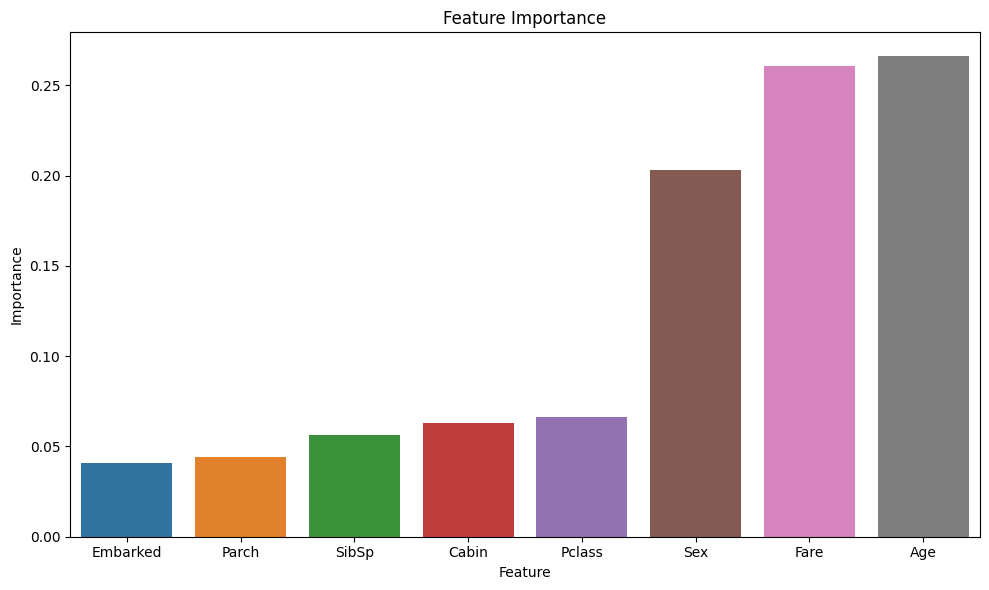

In [25]:
# TO-DO 5. Report the feature rankings with importance scores using the bar plot using barplot provided by seaborn library.

feature_importances = rf_model.feature_importances_
feature_names = X2.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance')

plt.figure(figsize=(10, 6))
chart = sns.barplot(x='Feature', y='Importance', data=feature_importance_df)

plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [26]:
# TO-DO 6. Use hyperparameter tuning with `GridSearchCV` to explore the grid ('n_estimators': [20, 50, 100, 200], 'criterion' :['gini', 'entropy']).
# Then, report the best parameters, the model accuracy, and confusion matrix. Discuss how much chosen parameters can help improve the model performance in Step 4.

param_grid = {'n_estimators': [20, 50, 100, 200], 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5)
grid_search.fit(X2_train_scaled, y2_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_model.fit(X2_train_scaled, y2_train)
y2_pred_tuned = best_model.predict(X2_test_scaled)
accuracy_tuned = accuracy_score(y2_test, y2_pred_tuned)
conf_matrix_tuned = confusion_matrix(y2_test, y2_pred_tuned)

print(f"Best Parameters: {best_params}")
print(f"Tuned Model Accuracy: {accuracy_tuned}")
print("Tuned Model Confusion Matrix:")
print(conf_matrix_tuned)

Best Parameters: {'criterion': 'entropy', 'n_estimators': 200}
Tuned Model Accuracy: 0.8212290502793296
Tuned Model Confusion Matrix:
[[91 14]
 [18 56]]
